In [38]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [46]:
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [0]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

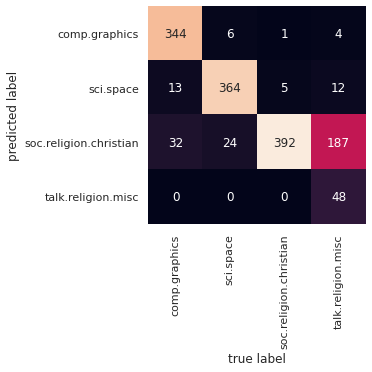

In [50]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [52]:
predict_category('sending a payload to the ISS')

'sci.space'

In [53]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [54]:
predict_category('determining the screen resolution')

'comp.graphics'

In [55]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [59]:
import pandas as pd
wine = pd.read_csv('/content/gdrive/My Drive/Wine.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [60]:
wine.columns = ['name', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine.head()

,name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [61]:
wine.isnull().sum()

name                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [62]:
wine.describe()


,name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [63]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

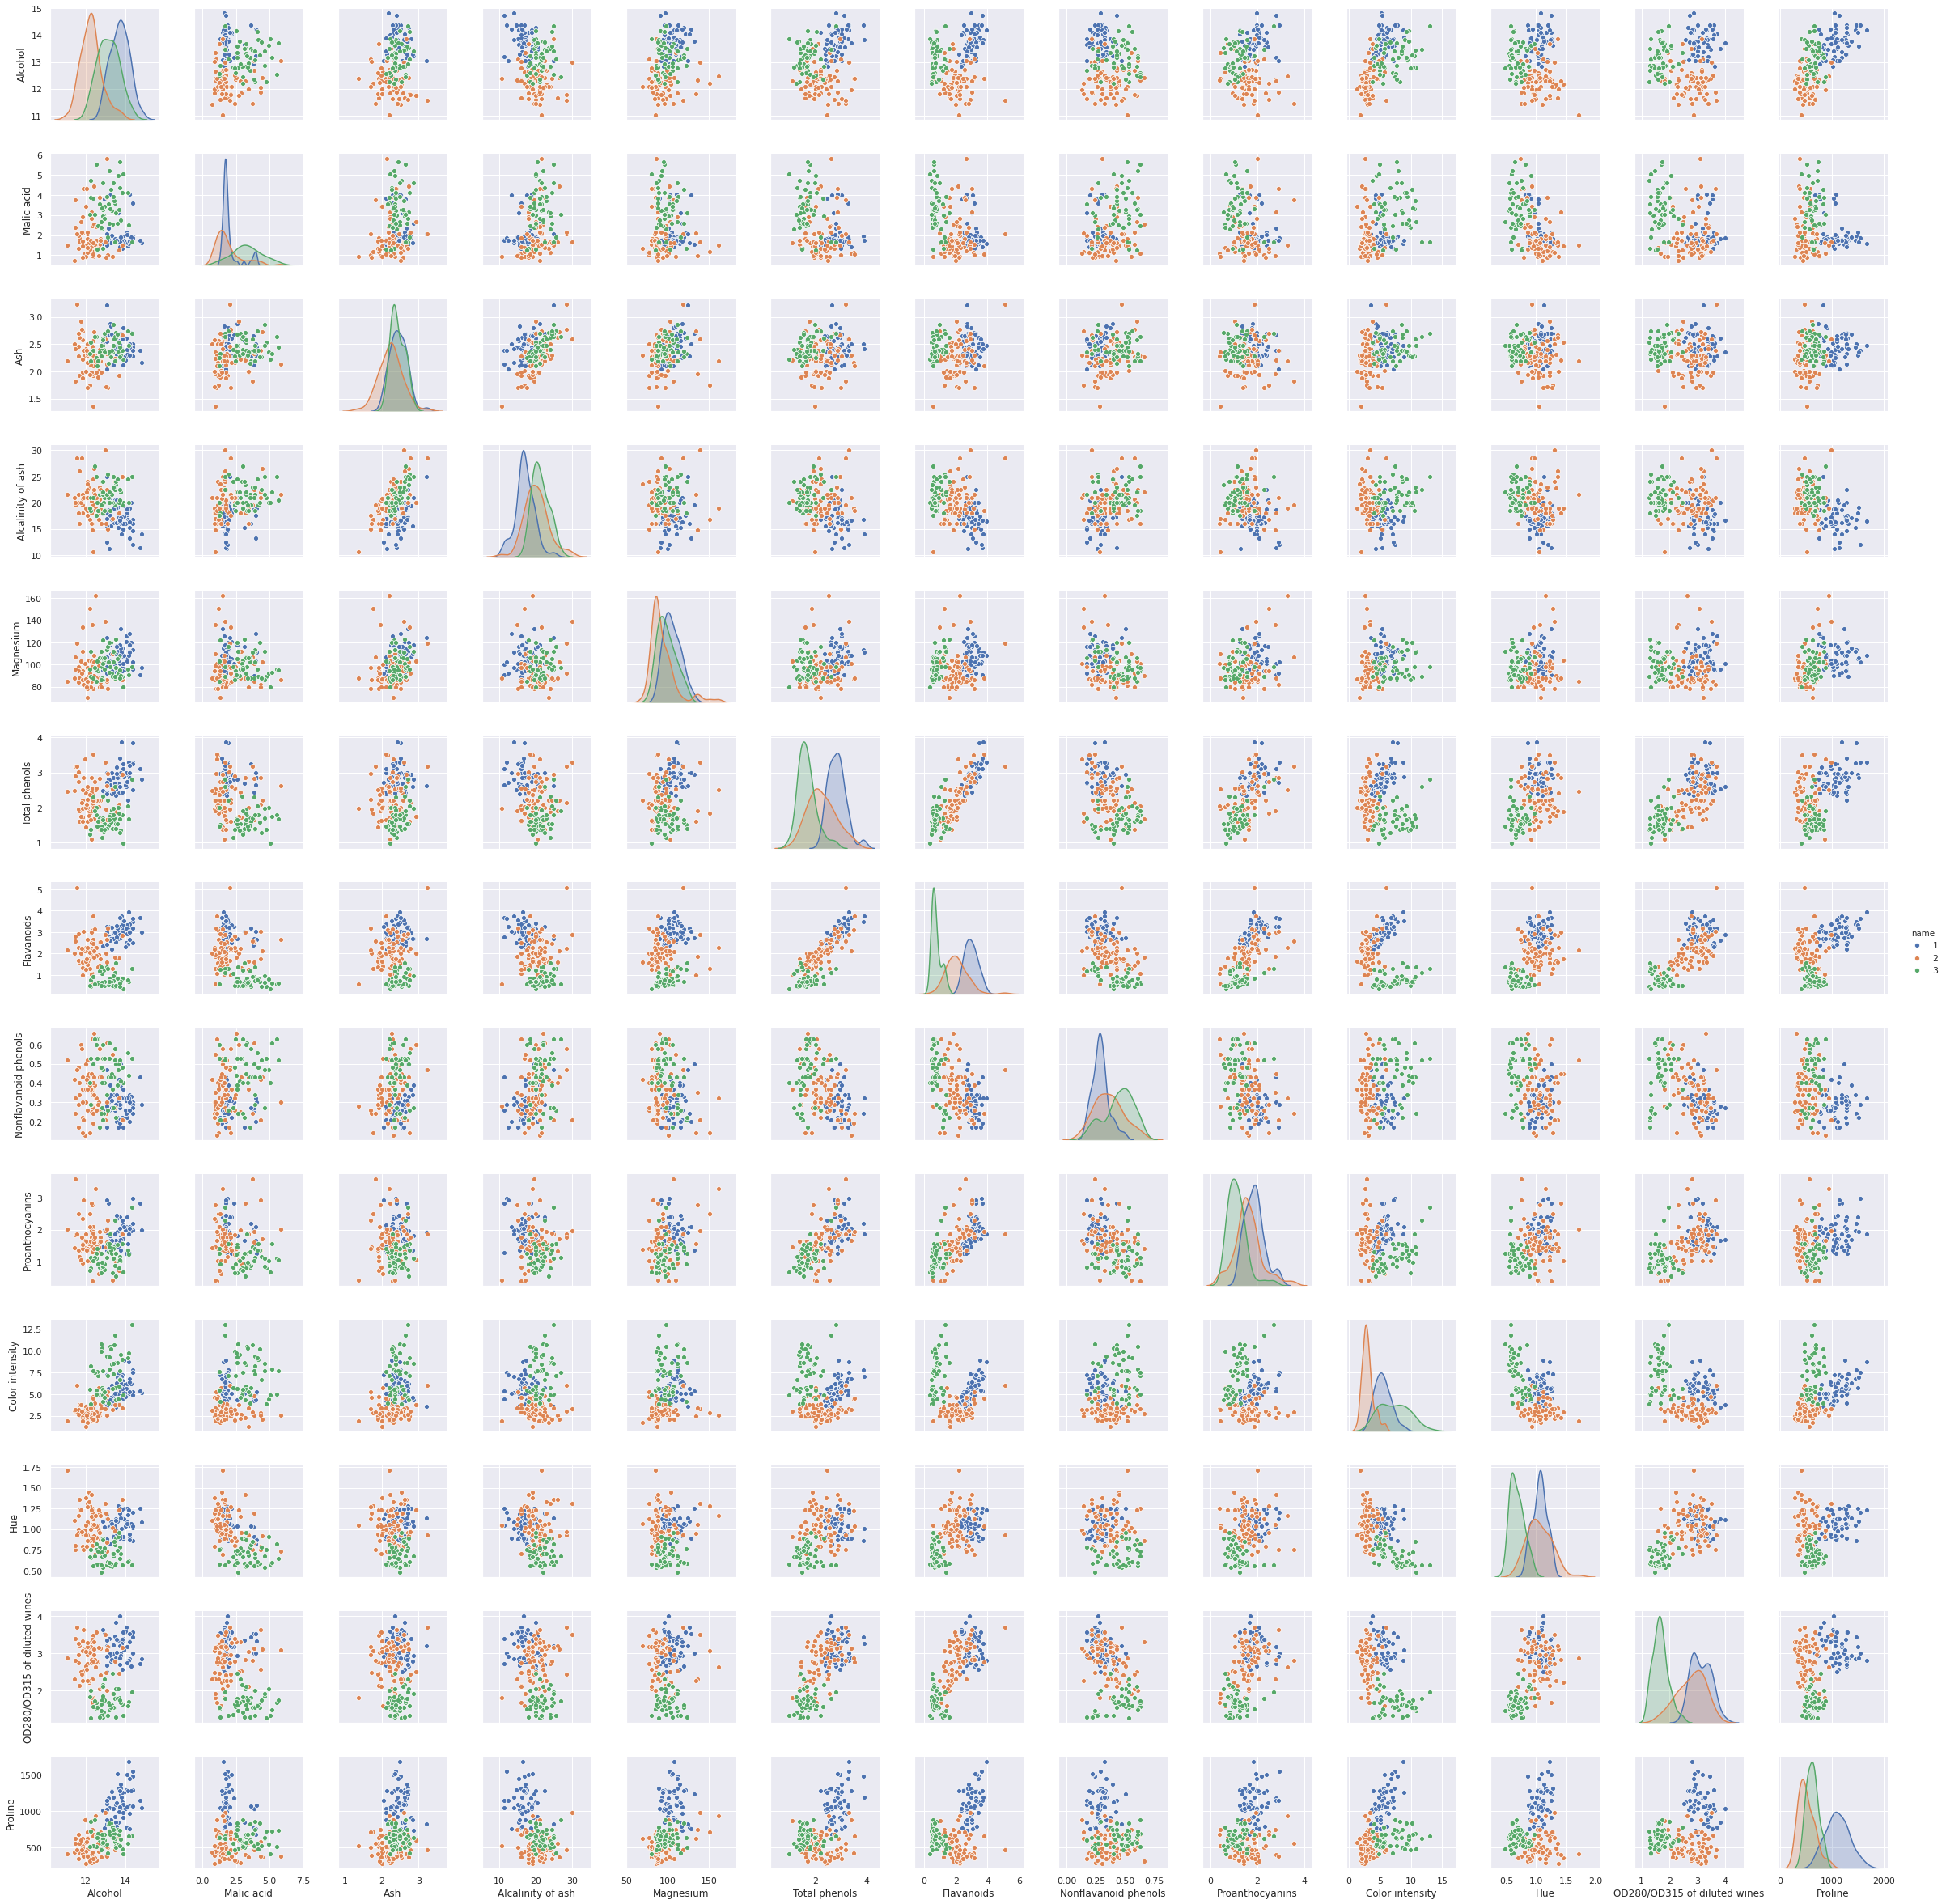

In [64]:

sns.pairplot(data=wine, hue='name',
             vars=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

In [0]:
data = wine[['name','Alcohol','Flavanoids']]


In [74]:
X = data[['Alcohol','Flavanoids']]
Y = data['name']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)

(123, 2)
(54, 2)


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)

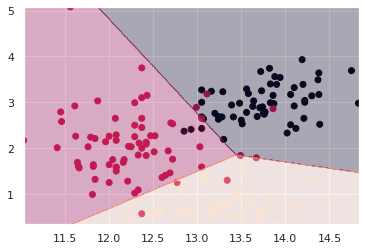

In [78]:
plt.scatter(data=data, x='Alcohol', y='Flavanoids', c='name')
grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['Flavanoids'].min(), X['Flavanoids'].max(), grid_size))
C = lda.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

In [81]:
print('LDA Train score :', lda.score(X_train, Y_train))
print('LDA Test score :', lda.score(X_test, Y_test))

LDA Train : 0.943089430894309
LDA Test : 0.9074074074074074


In [0]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)

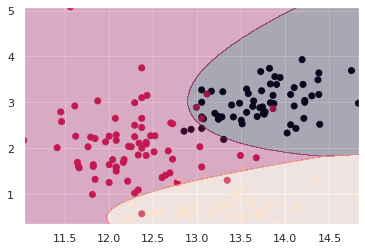

In [83]:
plt.scatter(data=data, x='Alcohol', y='Flavanoids', c='name')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['Flavanoids'].min(), X['Flavanoids'].max(), grid_size))
C = qda.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

In [84]:
print('QDA Train score :', qda.score(X_train, Y_train))
print('QDA Test score :', qda.score(X_test, Y_test))

QDA Train score : 0.9105691056910569
QDA Test score : 0.9259259259259259


In [0]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto').fit(X_train, Y_train)

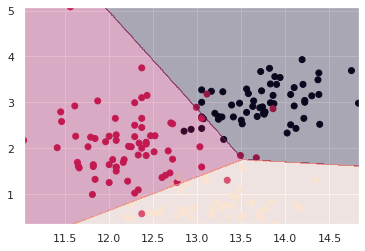

In [86]:
plt.scatter(data=data, x='Alcohol', y='Flavanoids', c='name')

grid_size = 500
A, B = np.meshgrid(np.linspace(X['Alcohol'].min(), X['Alcohol'].max(), grid_size),
                   np.linspace(X['Flavanoids'].min(), X['Flavanoids'].max(), grid_size))
C = logistic.predict(np.hstack([A.reshape(-1, 1), B.reshape(-1, 1)])).reshape(grid_size, grid_size)
plt.contourf(A, B, C, alpha=0.3)

In [87]:
print('LOGISTIC Train score :', logistic.score(X_train, Y_train))
print('LOGISTIC Test score :', logistic.score(X_test, Y_test))

LOGISTIC Train score : 0.9186991869918699
LOGISTIC Test score : 0.8888888888888888


In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    log = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
    kcv_score = cross_val_score(log, X_poly, Y_train, cv=5)
    kcv_score1 = cross_val_score(log,X_poly_test,Y_test, cv=5) 
    print('kcv_score when degree =',i, ':', kcv_score.mean(),kcv_score1.mean())

kcv_score when degree = 1 : 0.9033333333333333 0.8890909090909093
kcv_score when degree = 2 : 0.8949999999999999 0.9090909090909092
kcv_score when degree = 3 : 0.9033333333333331 0.9090909090909092


QDA의 TEST SCORE가 가장 좋기 때문에 이 모델들 중에서는 QDA가 가장 적합해보인다.
